In [2]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("train.csv")

# Show the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Around 38% of passengers survived.

The dataset is imbalanced — more passengers died than survived.



In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Females had a much higher survival rate than males.

Suggests gender played a key role in survival priority.



In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
The mean Age is around 29 years, with the youngest being 0.42 and the oldest 80.
- The Fare has a wide range: most passengers paid low fares, but a few paid very high amounts (max = 512).
- Standard deviations in Age and Fare suggest varied age groups and a wide gap in ticket prices.
- The Survived column shows a mean of 0.38, indicating that about 38% of passengers survived.
- Columns like SibSp and Parch are mostly low values, showing most passengers had few family members aboard.


In [6]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Cabin has the most missing values (around 77% of the data is missing), so it may be dropped or imputed.
Age has some missing values (19%), which should be filled using methods like mean, median, or predictive modeling.
Embarked has only a couple of missing entries and can be safely imputed using the most frequent value (mode).
All other columns are complete and do not require missing value handling.

In [7]:
df['Sex'].value_counts()
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
The sex column shows that there were significantly more male passengers than female.
This gender imbalance is important for survival analysis, as earlier plots showed females had a higher survival rate.

The Embarked column reveals that most passengers boarded from Southampton ('S'), followed by Cherbourg ('C') and Queenstown ('Q').
This suggests Southampton was the major departure point.
Knowing this distribution helps when imputing missing Embarked values and understanding regional patterns in the data.

Matplotlib is building the font cache; this may take a moment.


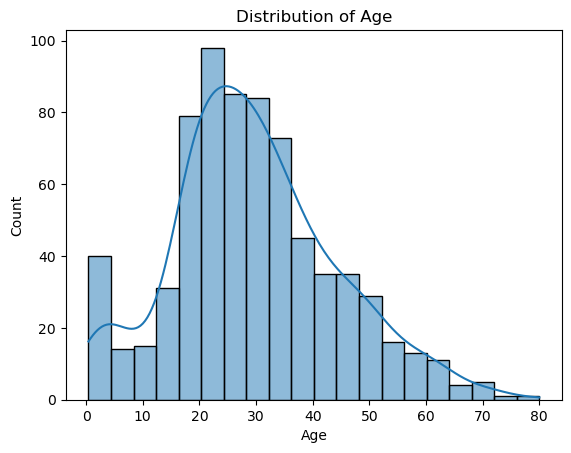

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Distribution of Age")
plt.show()


In [ ]:
The histogram shows that most passengers were between 20 and 40 years old.
The distribution is slightly right-skewed, with fewer older passengers.
There are also some very young passengers, including infants.
Missing age values were excluded from this plot using dropna().


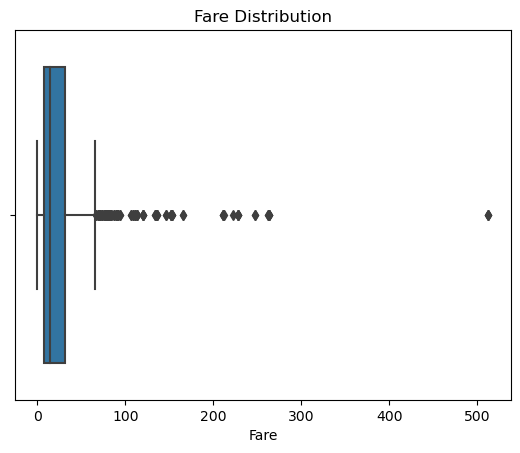

In [9]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution")
plt.show()


In [ ]:
The boxplot shows that most passengers paid lower fares, but there are several high-value outliers.
A few passengers paid significantly more than the average, likely those in first class.
The distribution is right-skewed, indicating that most ticket prices were clustered at the lower end.


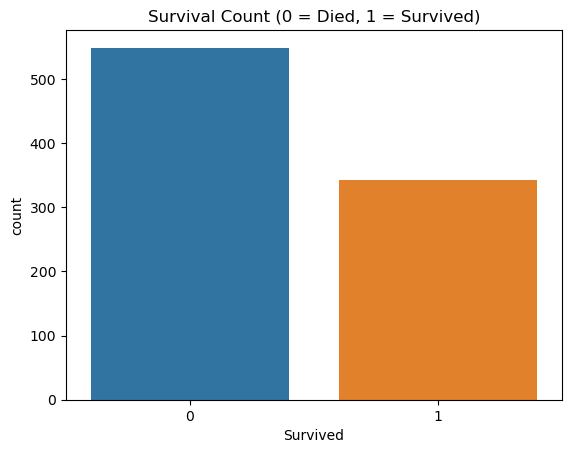

In [10]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


In [ ]:
The plot shows that more passengers died than survived.
There is a clear imbalance in the dataset, with a higher count of non-survivors (label 0).
This class imbalance may need to be considered during modeling to avoid biased predictions.


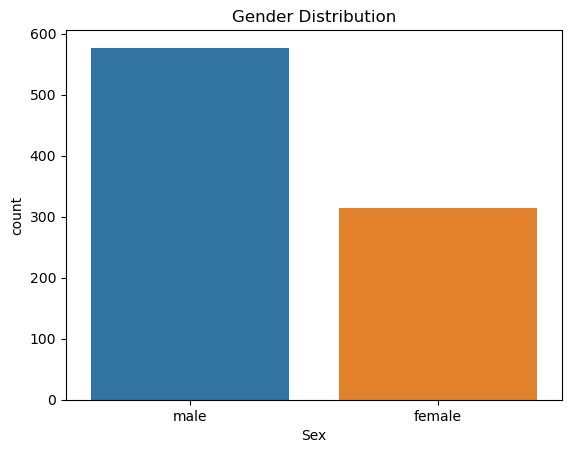

In [11]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


In [ ]:
The plot shows that there were more male passengers than female passengers on the Titanic.
This gender imbalance may have influenced overall survival statistics.
Understanding this distribution is important when analyzing the impact of gender on survival rates.


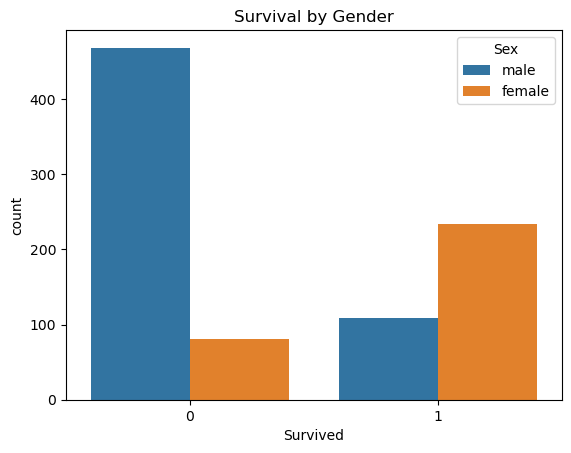

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


In [ ]:
The plot shows that a higher number of female passengers survived compared to males.
Most male passengers did not survive, while most female passengers did.
This suggests that gender played a significant role in survival chances.
It is likely that women were prioritized during evacuation efforts.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


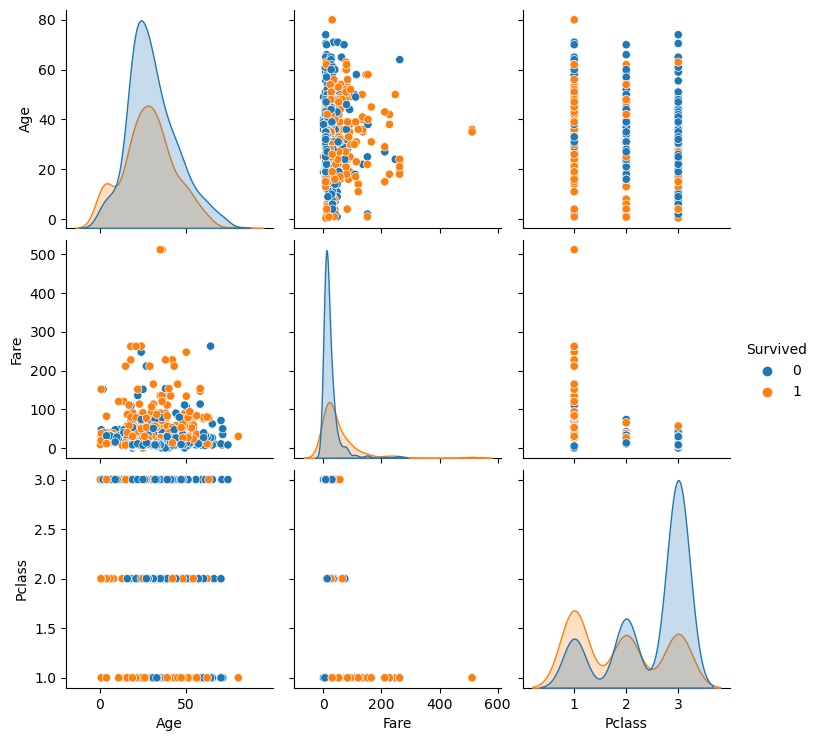

In [13]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()


In [ ]:
The pairplot shows that passengers who paid higher fares and belonged to first class were more likely to survive.
Survivors are more concentrated in areas with lower Pclass values and higher Fare amounts.
The Age variable does not show a strong separation between survivors and non-survivors.
Overall, Fare and Pclass appear to be more predictive of survival than Age in this visual compariso

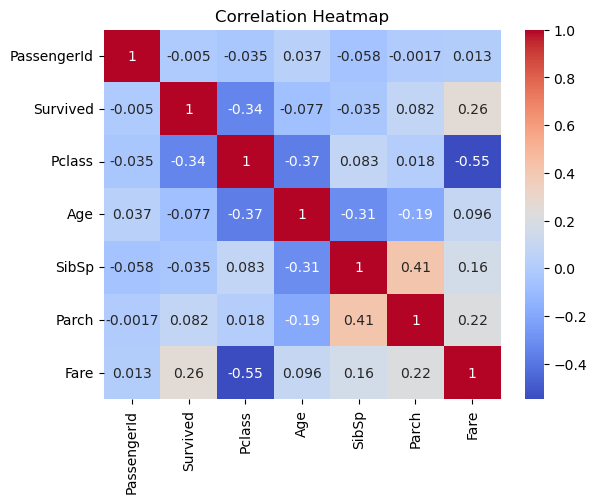

In [14]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
Fare and Pclass are negatively correlated (higher class, higher fare).

Survived is positively correlated with Fare and Pclass.

